In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib     
font = {'size'   : 16}
matplotlib.rc('font', **font)

# Wellfare Loss - Single Normal Distribution $\mu=0$ 

## The data

In [44]:
df = pd.read_csv('2020.01.31 - QVoting-NormalizedPivotality 1p1v-vs-QV-mean=0-agg.csv')

def color(x):
    if x == 3:
        return 'blue'
    else:
        return 'orange'

df['wellfare-loss'] = 1 - df['mean payoff-sign-list']
df['color'] = df['majority-utility-stdev'].apply(color)
df.rename(columns={'variance-of-perceived-pivotality': 'variance-of-pp'}, inplace=True)
df[0:5]

,[run number],number-of-voters,minority-fraction,majority-mean-utility,majority-utility-stdev,minority-mean-utility,minority-utility-stdev,marginal-pivotality,variance-of-pp,limit-votes?,...,voting-mechanism,[step],mean payoff-sign-list,mean payoff-list,standard-deviation payoff-list,mean vote-sum-list,standard-deviation vote-sum-list,mean mean-median-same-sign-list,wellfare-loss,color
0,2,10,0,0,3,10,1,0.5,0.0003,False,...,QV,1000,0.985,7.511402,5.709273,-0.016389,4.718080,0.824,0.015,blue
1,1,10,0,0,3,10,1,0.5,0.0003,False,...,1p1v,1000,0.780,5.425746,7.052433,0.006000,3.086339,0.823,0.220,blue
2,3,10,0,0,3,10,1,0.5,0.0010,False,...,1p1v,1000,0.763,5.339738,7.693429,-0.214000,3.167371,0.800,0.237,blue
3,5,10,0,0,3,10,1,0.5,0.0100,False,...,1p1v,1000,0.799,6.065235,7.439300,-0.032000,3.227599,0.828,0.201,blue
4,4,10,0,0,3,10,1,0.5,0.0010,False,...,QV,1000,0.976,7.424793,5.644016,0.241649,4.678708,0.819,0.024,blue


## Wellfare loss of 1p1v vs number of voters

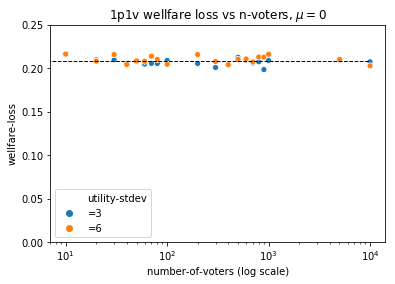

mean wellfare loss: 0.2083770833333333


In [41]:
adf = df[(df['voting-mechanism'] == "1p1v")].groupby(['number-of-voters', 'majority-utility-stdev']).aggregate('mean').reset_index()
adf['utility-stdev'] = adf['majority-utility-stdev'].apply(lambda n: '=' + str(n))

ax = sns.scatterplot(x="number-of-voters", 
                     y="wellfare-loss",    
                     hue='utility-stdev',
                     data = adf)
ax.set(xscale="log", 
       ylim= (0, 0.25),
       xlabel = "number-of-voters (log scale)")

plt.plot([0, adf['number-of-voters'].max()], [adf['wellfare-loss'].mean()]  * 2, 'k--', linewidth=1)
plt.title("1p1v wellfare loss vs n-voters, $\mu=0$")
plt.show()
print("mean wellfare loss: {}".format(adf['wellfare-loss'].mean()))

## Wellfare loss of QV vs N Voters

### Wellfare loss vs number of voters for several marginal pivotalities

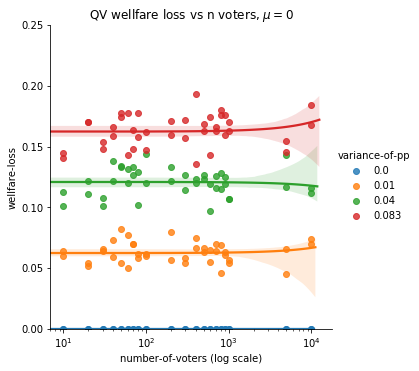

In [72]:
pdf = df[(df['voting-mechanism'] == 'QV') & (df['variance-of-pp'].isin([0, 0.01, 0.04, 0.083]))]

ax2 = sns.lmplot(x="number-of-voters", 
                     y="wellfare-loss",    
                     hue='variance-of-pp',
                     data = pdf)

ax2.set(xscale="log", 
       ylim= (0, 0.25),
       xlabel = "number-of-voters (log scale)")

plt.title('QV wellfare loss vs n voters, $\mu=0$')
plt.show()

### Wellfare loss vs number of voters for each marginal pivotality

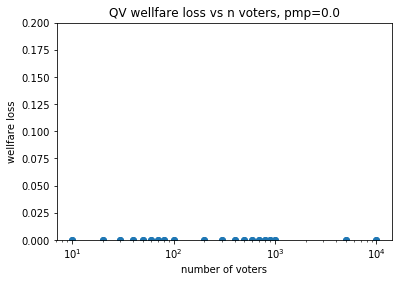

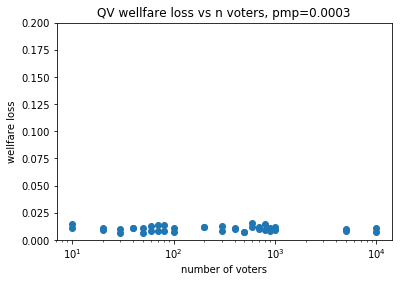

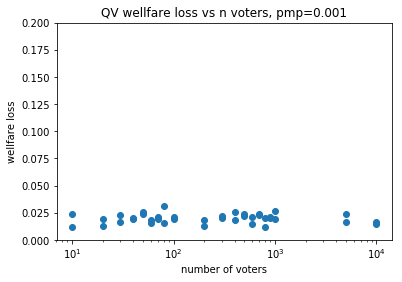

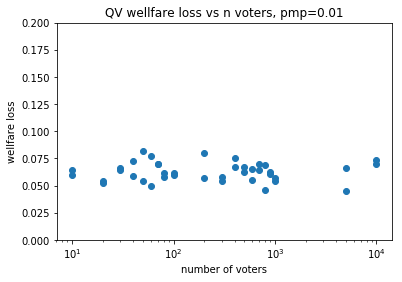

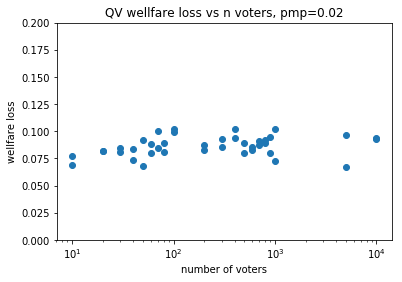

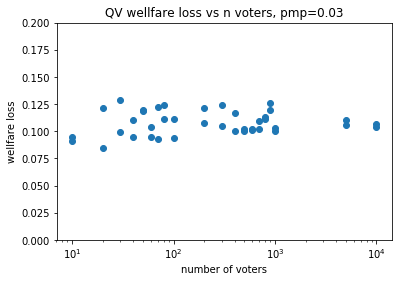

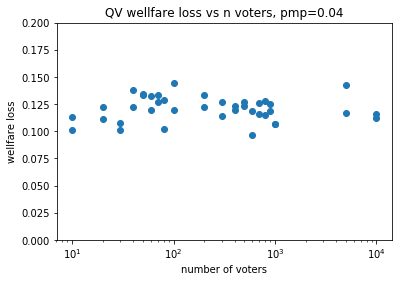

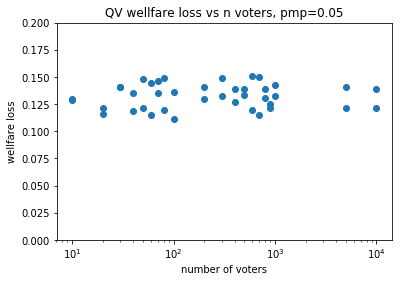

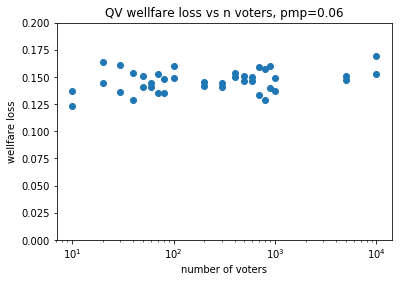

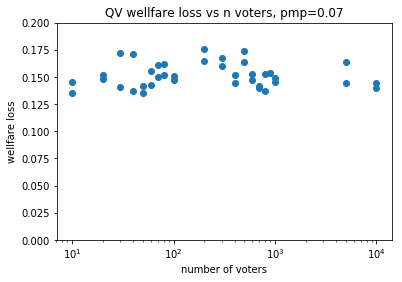

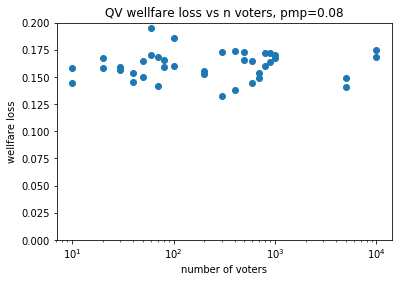

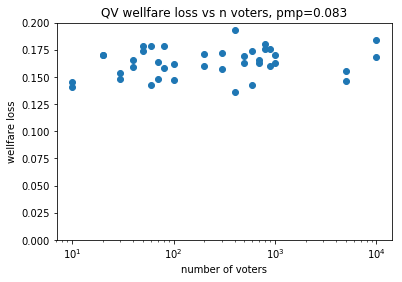

In [129]:
# adf = df[(df['voting-mechanism'] == "QV")].groupby(['number-of-voters', 'majority-utility-stdev', 'variance-of-perceived-pivotality']).aggregate('mean').reset_index()
for pmp in sorted(df['variance-of-perceived-pivotality'].unique()):
    pdf = df[(df['voting-mechanism'] == 'QV') & (df['variance-of-perceived-pivotality']==pmp)]
    plt.scatter(pdf['number-of-voters'], pdf['wellfare-loss'])
    plt.xscale('log')
    plt.xlabel('number of voters')
    plt.ylabel('wellfare loss')
    plt.title("QV wellfare loss vs n voters, pmp={}".format(pmp))
    plt.ylim(0, 0.2)
    plt.show()

## Wellfare loss of QV vs Variance of Percieved Pivotality

### Wellfare loss vs variance-of-pp for all populations sizes together


0.208377083333333

In [ ]:
sns.lineplot(x=)

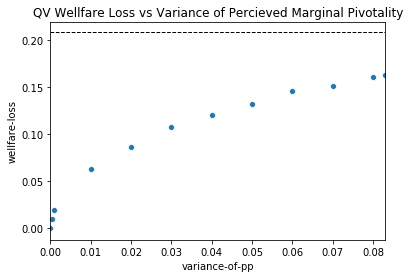

In [87]:
adf = df[(df['voting-mechanism'] == "QV")].groupby('variance-of-pp').aggregate('mean').reset_index()

ax = sns.scatterplot(x='variance-of-pp',
                y='wellfare-loss',
                data=adf)
ax.set(xlim=(0, 0.083))


wl_1p1v = df[(df['voting-mechanism'] == "1p1v")]['wellfare-loss'].mean()
plt.plot([0, 0.083], [wl_1p1v]*2, 'k--', linewidth=1)
plt.title('QV Wellfare Loss vs Variance of Percieved Marginal Pivotality')
plt.show()

### Wellfare loss vs variance-of-pp for each n_voters

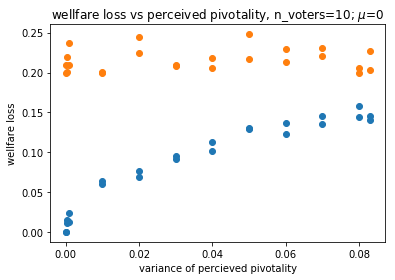

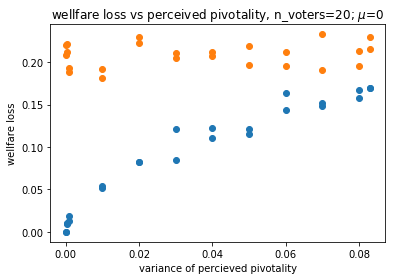

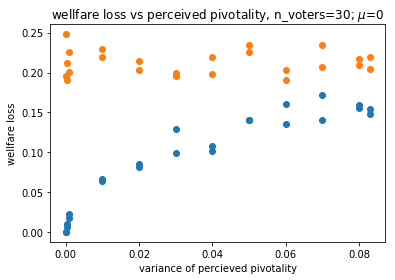

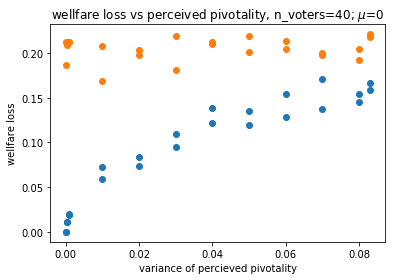

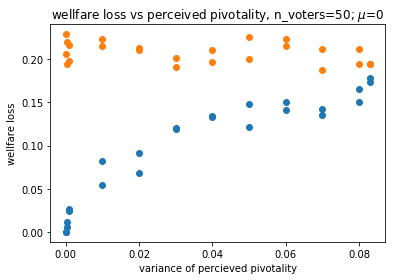

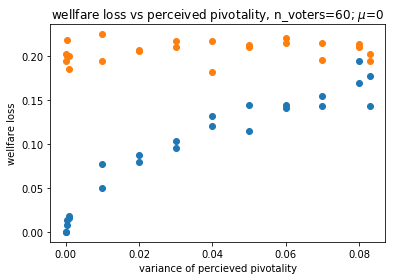

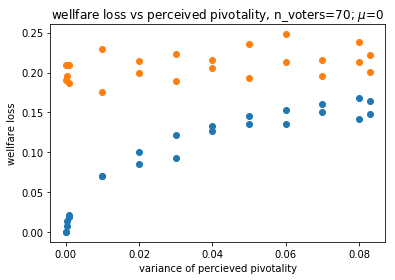

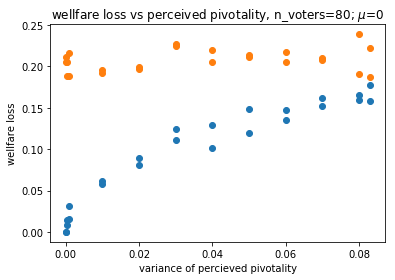

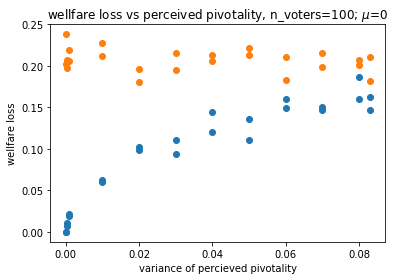

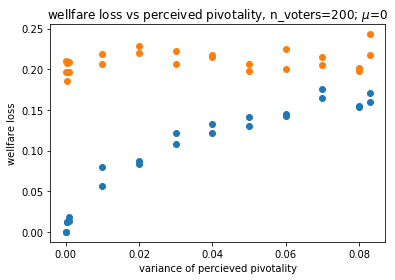

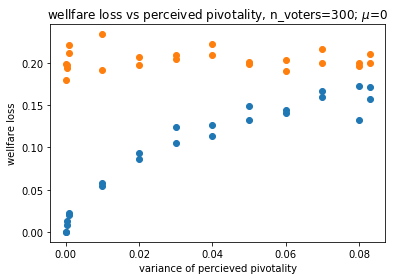

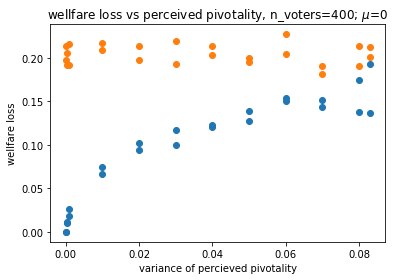

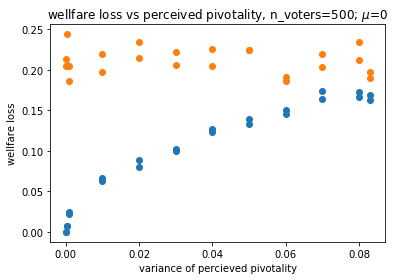

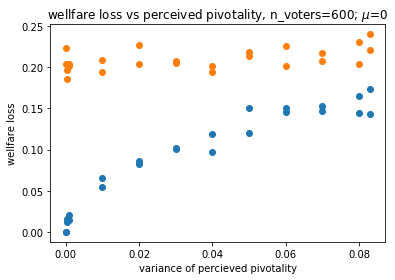

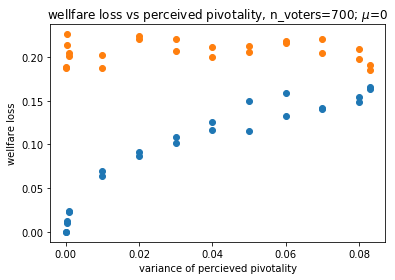

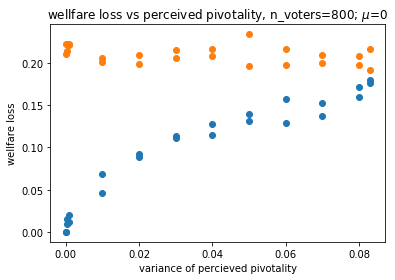

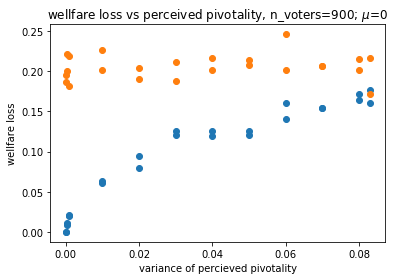

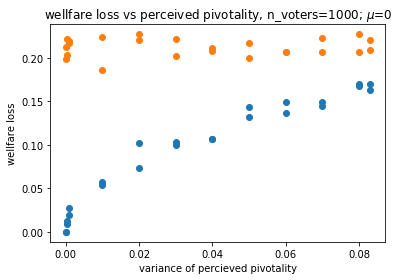

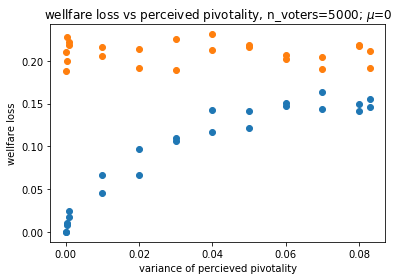

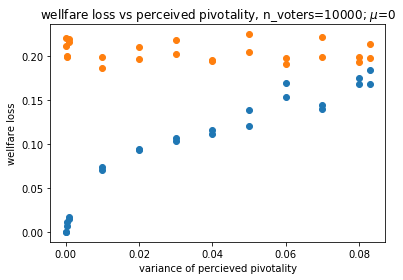

In [69]:

for n_voters in df['number-of-voters'].unique():
    df_qv = df[(df['number-of-voters'] == n_voters) & (df['voting-mechanism'] == "QV")].sort_values('variance-of-perceived-pivotality')
    df_1p1v = df[(df['number-of-voters'] == n_voters) & (df['voting-mechanism'] == "1p1v")]
    plt.plot(df_qv['variance-of-perceived-pivotality'], df_qv['wellfare-loss'], 'o')
    plt.plot(df_1p1v['variance-of-perceived-pivotality'], df_1p1v['wellfare-loss'], 'o')
    plt.xlabel('variance of percieved pivotality')
    plt.ylabel('wellfare loss')
    plt.title('wellfare loss vs perceived pivotality, n_voters={}; $\mu$=0'.format(n_voters))
    plt.show()

# Wellfare Loss Prop 8 Calibration


## The Data

In [2]:
df8 = pd.read_csv('2020.02.07 - QVoting-NormalizedPivotality 1p1v-vs-QV-prop8-mean>0.csv')
df8.rename(columns={'variance-of-perceived-pivotality': 'variance-of-pp'}, inplace=True)
df8['wellfare-loss'] = 1 - df8['mean payoff-sign-list']
df8_1p1v = df8[(df8['voting-mechanism'] == "1p1v")]
df8_QV = df8[(df8['voting-mechanism'] == "QV")]

In [89]:
df8[0:5]

,[run number],number-of-voters,calibration,marginal-pivotality,variance-of-pp,voting-mechanism,[step],mean payoff-sign-list,mean payoff-list,standard-deviation payoff-list,mean vote-sum-list,standard-deviation vote-sum-list,mean mean-median-same-sign-list,wellfare-loss
0,1,11,1. prop8-mean>0,0.5,0.0000,1p1v,1000,0.787,1.513758,3.798378,-0.346000,3.372189,0.787,0.213
1,2,11,1. prop8-mean>0,0.5,0.0000,QV,1000,1.000,2.586638,3.359160,0.602044,2.032860,0.780,0.000
2,3,11,1. prop8-mean>0,0.5,0.0003,1p1v,1000,0.759,1.539862,4.396764,-0.608000,3.249753,0.759,0.241
3,4,11,1. prop8-mean>0,0.5,0.0003,QV,1000,0.985,2.585631,3.256052,0.653345,1.982123,0.770,0.015
4,5,11,1. prop8-mean>0,0.5,0.0010,1p1v,1000,0.805,1.477022,3.996354,-0.342000,3.347573,0.805,0.195


##  Wellfare Loss of 1p1v vs number of voters

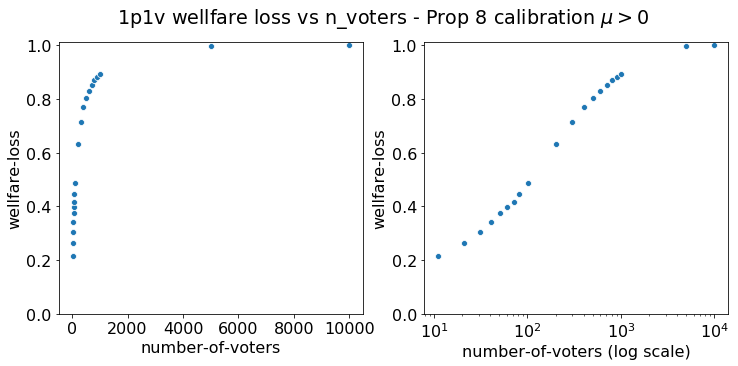

In [5]:
# Get mean across all data for same number of voters, since marginal pivotality doesn't matter for 1p1v
adf = df8_1p1v.groupby(['number-of-voters']).aggregate('mean').reset_index()

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="number-of-voters", 
                y="wellfare-loss",
                data = adf,
                ax=ax1)

sns.scatterplot(x="number-of-voters", 
                y="wellfare-loss",
                data = adf,
                ax=ax2)
ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
ax1.set(ylim=(0,1.01))
ax2.set(ylim=(0,1.01))
f.suptitle('1p1v wellfare loss vs n_voters - Prop 8 calibration $\mu>0$')
plt.show()

## Wellfare loss of QV vs number of voters

### Single Graph with Three variance-of-pp values 

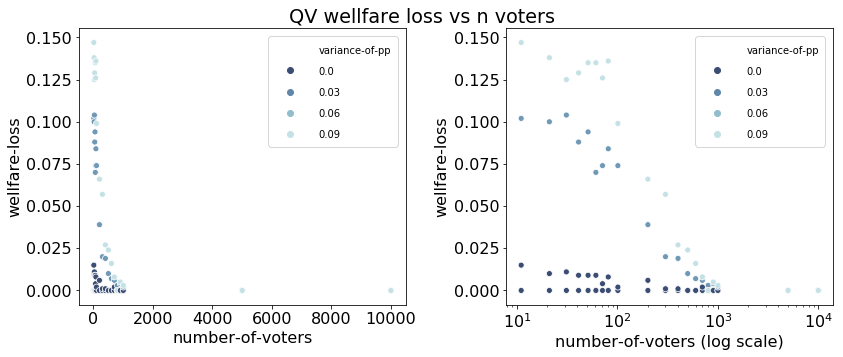

In [15]:
pdf = df8_QV[df8_QV['variance-of-pp'].isin([0, 0.0003, 0.04, 0.083])]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                hue='variance-of-pp',
                palette="ch:r=-.2,d=.3_r",
                data=pdf, ax=ax1)

sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                hue='variance-of-pp',
                palette="ch:r=-.2,d=.3_r",
                data=pdf, ax=ax2)
ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")

plt.setp(ax1.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='10') # for legend title
plt.setp(ax2.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='10') # for legend title

f.suptitle("QV wellfare loss vs n voters", y=1)

f.tight_layout()



### Separate Graphs for Each Variance-of-pp  value

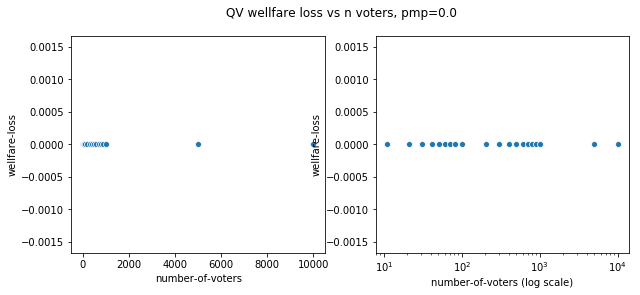

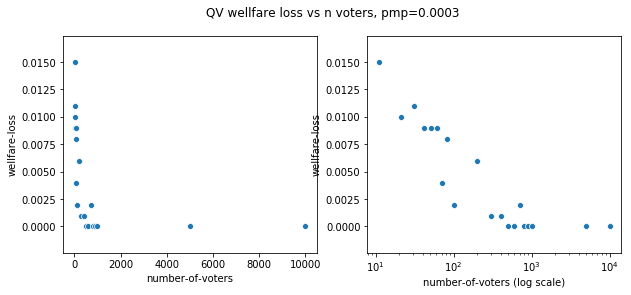

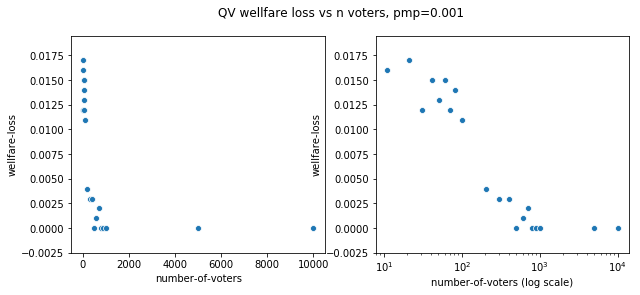

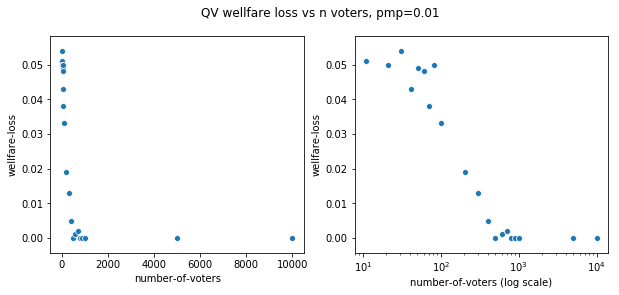

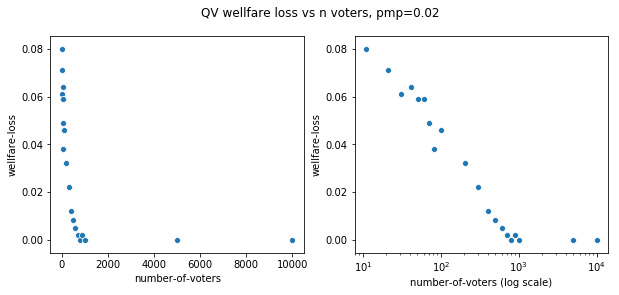

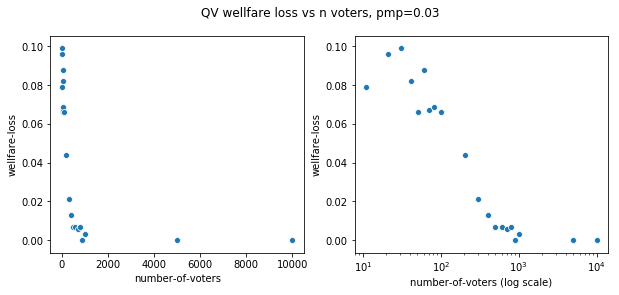

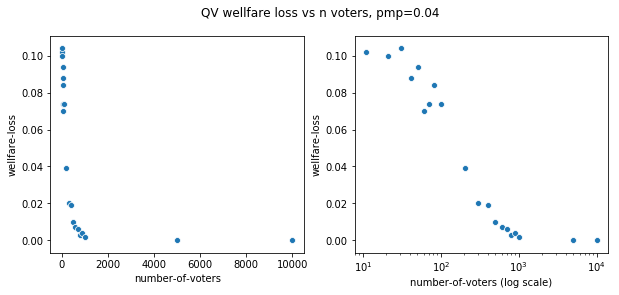

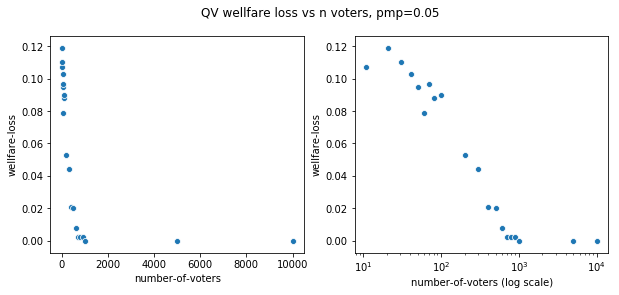

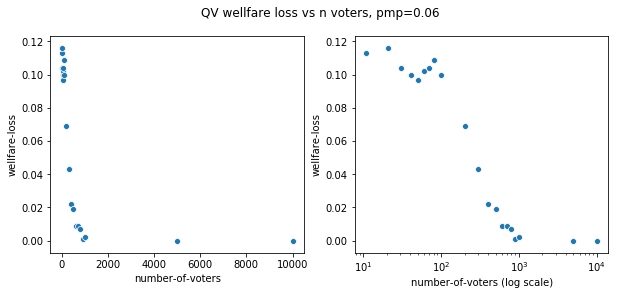

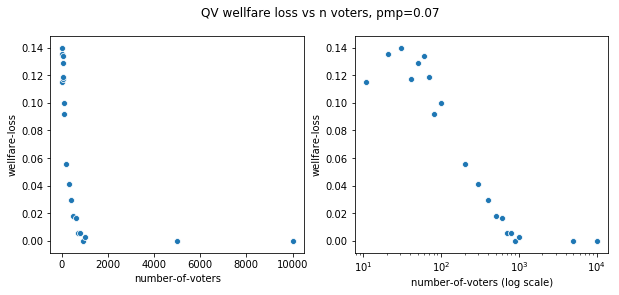

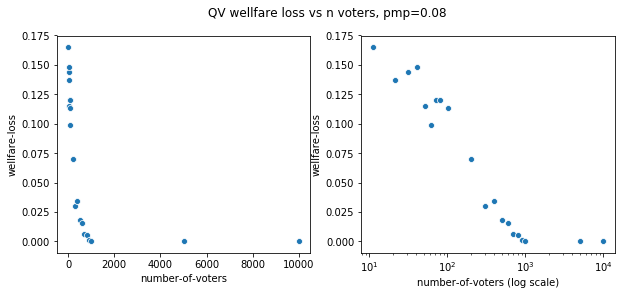

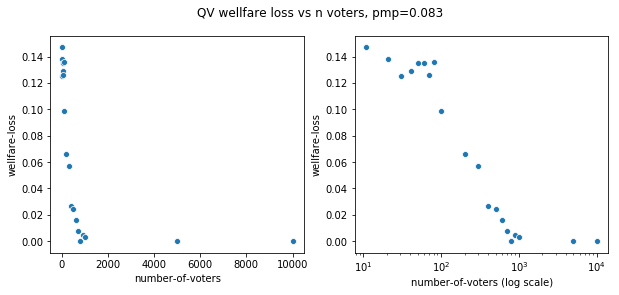

In [51]:
for pmp in sorted(df8_QV['variance-of-perceived-pivotality'].unique()):
    pdf = df8_QV[df8_QV['variance-of-perceived-pivotality']==pmp]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                    data=pdf, ax=ax1)

    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                    data=pdf, ax=ax2)
    ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
    
    f.suptitle("QV wellfare loss vs n voters, pmp={}".format(pmp))
    plt.show()

## Wellfare loss of QV vs Variance of Percieved Pivotality

### Single Graph with four number-of-voters values

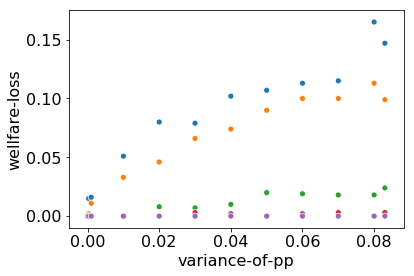

<Figure size 720x576 with 0 Axes>

In [25]:
pdf = df8_QV[df8_QV['number-of-voters'].isin([11, 101, 501, 1001, 10001])].copy()
pdf['n_voters'] = pdf['number-of-voters'].apply(lambda n: "=" + str(n))

ax = sns.scatterplot(x="variance-of-pp", y="wellfare-loss",
                hue="n_voters",
                legend='full',
                data = pdf)

plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='8') # for legend title
plt.figure(figsize=(10, 8))
ax.legend_.remove()

plt.show()

### Separate Graphs for Each number-of-voters value

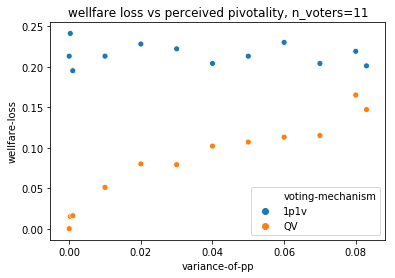

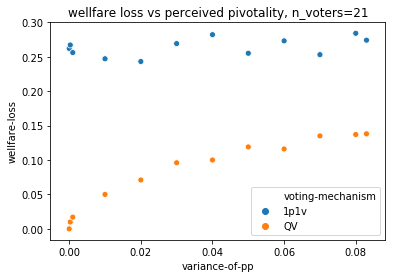

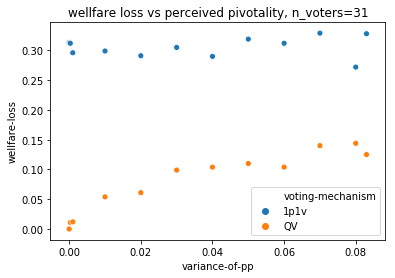

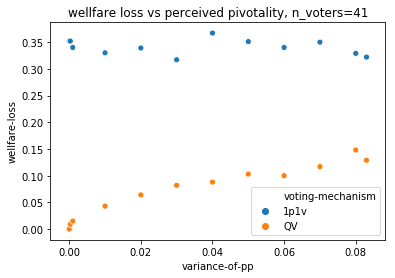

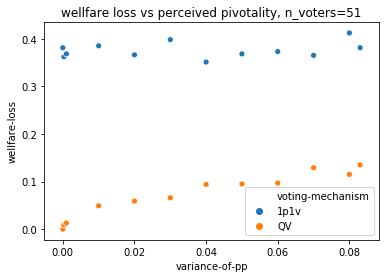

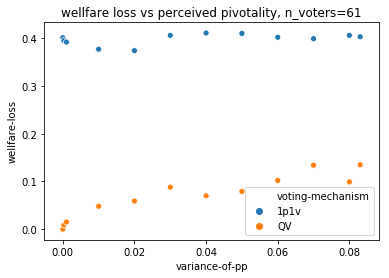

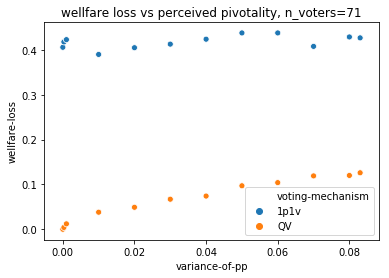

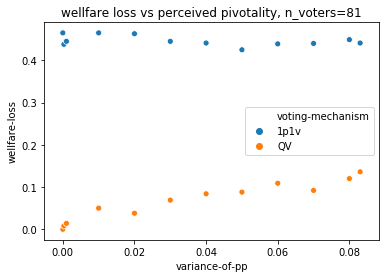

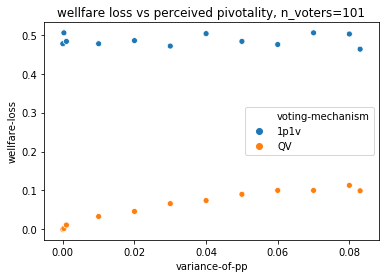

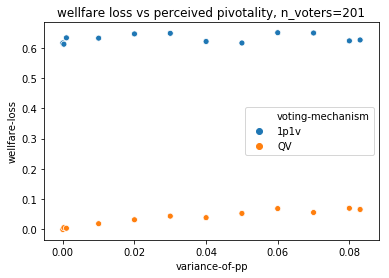

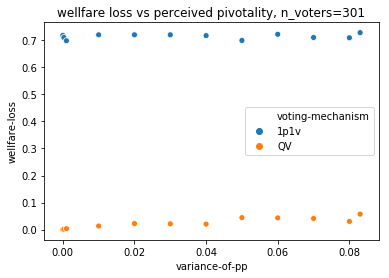

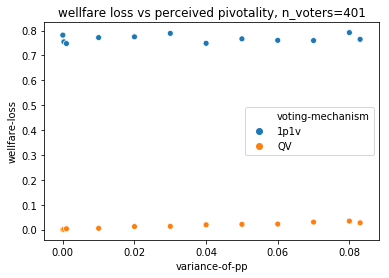

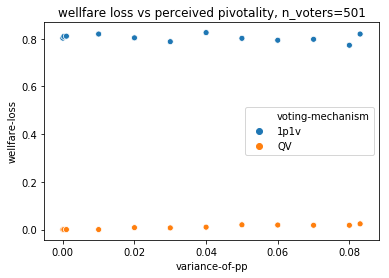

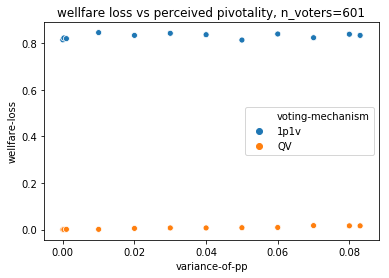

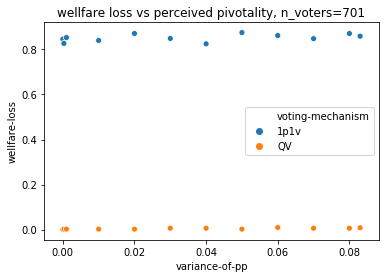

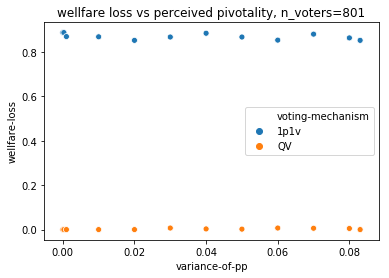

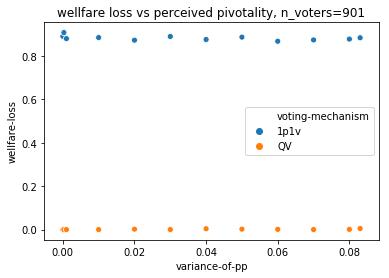

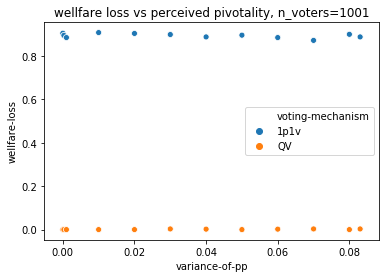

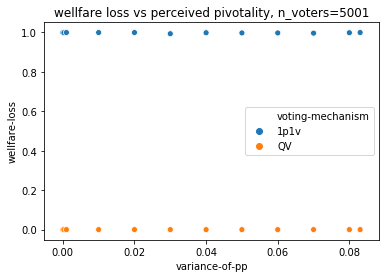

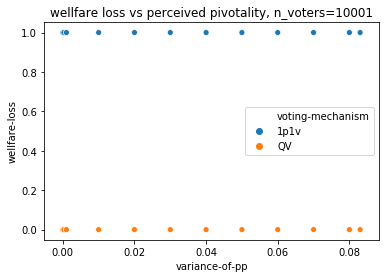

In [98]:
for n_voters in df8['number-of-voters'].unique():
    ax = sns.scatterplot(x="variance-of-pp", y="wellfare-loss",
                    hue="voting-mechanism",
                    data = df8[df8["number-of-voters"] == n_voters])
    ax.set_title('wellfare loss vs perceived pivotality, n_voters={}'.format(n_voters))
    plt.show()